# Hermite Cubic Splines

Hermite cubic splines are defined in $[x_{i-1}, x_i]$ with the given condition

1. $f(x_i) = s(x_i)$
2. $f'(x_i) = s'(x_i)$

Assuming interval is $[x_0, x_1]$ then we have

$$
    s(x) = a + b (x-x_0) + c (x-x_0)^2 + d (x-x_0)^3
$$

Now 

$$
        a = f(x_0)\\
        b = f'(x_0)\\
    f(x_1) = a + bh + ch^2+dh^3\\
    f'(x_1) = b + 2ch + 3dh^2\\
$$

Slving them we get

$$
    a = f_0\\
    b = f'_0\\
    c = 3 \frac{f_1-f_0}{h^2} - \frac{f'_1+2f'_0}{h}\\
    d = \frac{f'_1+f'_0}{h^2} - 2\frac{f_1-f_0}{h^3}\\
$$


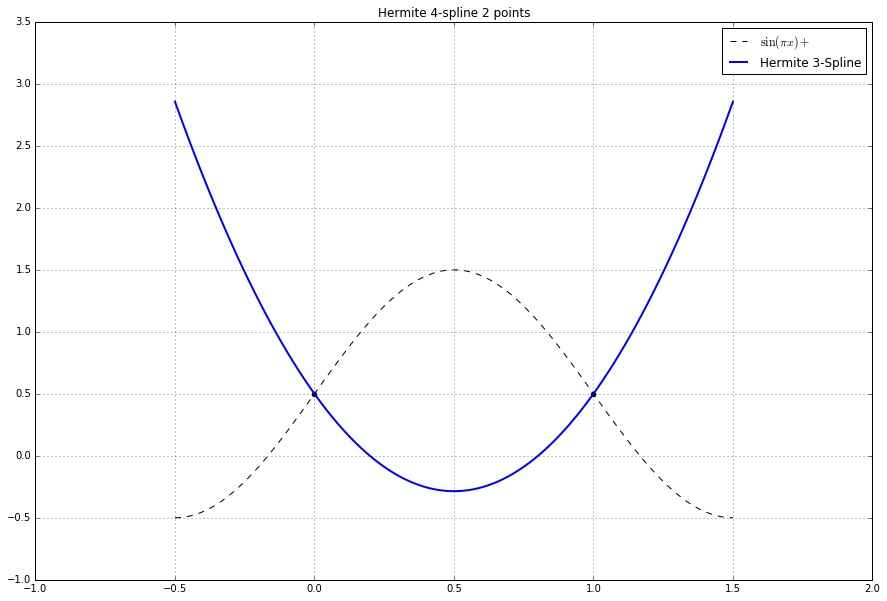

In [21]:
# 2 point SPline test
# f(x) = sin(pi*x)+.5
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

Xs = [0, 1]
Fx = [.5, .5]
Fprime = [-np.pi, np.pi]

class TwoPointHermiteSpline3:
    def __init__(self, X, Fx, Fprime):
        self.X = X
        self.Fx = Fx
        self.Fprime = Fprime
        
        self.setup_coeffs()
    
    def setup_coeffs(self):
        # Setup the coefficients of the Polynomial
        f0, f1 = self.Fx
        x0, x1 = self.X
        fp0, fp1 = self.Fprime
        h = x1-x0
        
        self.a = f0
        self.b = fp0
        
        self.c = 3*(f1-f0)/h**2 - (fp1+2*fp0)/h
        self.d = (fp1+fp0)/h**2 - 2*(f1-f0)/h**3
    
    def get_coeffs(self):
        return self.a, self.b, self.c, self.d
    
    def __call__(self, x):
        
        xx = x - self.X[0]
        return self.a + self.b*xx + self.c * xx**2 + self.d * xx**3

# Plotting the interpolated poly


def HermiteInterpolatePlot(Xs, Fx, Fprime):
    plt.figure(figsize=(15, 10))

    plX = np.linspace(Xs[0]-.5, Xs[-1]+.5, 100)
    plt.plot(plX, sin(pi*plX)+.5, 'k--', alpha=1, label='$\sin(\pi x)+\frac{1}{2}$')

# p += scatter_plot(zip(X, Y))
    plt.scatter(Xs, Fx, color='black')
    spline = TwoPointHermiteSpline3(Xs, Fx, Fprime)

# f(x) = spline(x)
    plt.plot(plX, [spline(px) for px in plX], lw=2, label='Hermite 3-Spline')
    plt.grid()
    plt.legend()
    plt.title("Hermite 4-spline 2 points")
    plt.show()

HermiteInterpolatePlot(Xs, Fx, Fprime)

In [22]:
# Multi point Hermite Interpolation

import numpy as np

class HermiteSplineMultipoint:
    def __init__(self, X, Fx, Fprime):
        self.X = X
        self.Fx = Fx
        self.Fprime = Fprime
        self.m = len(X)-1
        self.setup_coeffs()
    
    def setup_coeffs(self):
        
        m = self.m
        Coeffs = np.zeros((m+1, 4), dtype='float')
        for i in range(m):
            
            f0, f1 = self.Fx[i], self.Fx[i+1]
            x0, x1 = self.X[i], self.X[i+1]
            fp0, fp1 = self.Fprime[i], self.Fprime[i+1]
            h = x1-x0
        
            Coeffs[i, 0] = f0
            Coeffs[i, 1] = fp0
        
            Coeffs[i, 2] = 3*(f1-f0)/h**2 - (fp1+2*fp0)/h
            Coeffs[i, 3] = (fp1+fp0)/h**2 - 2*(f1-f0)/h**3
        
        self.Coeffs = Coeffs
    
    def find_interval(self, x):
        if x < self.X[0]: return 0
        for i in range(len(self.X)):
#             print(i)
            if x <= self.X[i]:
                return i-1
        if x > self.X[-1]: return len(self.X)-2
    
    def __call__(self, x):
        i = self.find_interval(x)
#         print(i)
        xx = x - self.X[i]
        
        a, b, c, d = self.Coeffs[i]
        return a+b*xx+c*xx**2+d*xx**3
    
    def get_poly_of_index(self, i):
        a, b, c, d = self.Coeffs[i]
        x0 = self.X[i]
        a = round(a, 2)
        b = round(b, 2)
        c = round(c, 2)
        d = round(d, 2)
        return (a+b*(x-x0)+c*(x-x0)^2+d*(x-x0)^3).expand()
    
    def get_coeffs(self, i):
        a, b, c, d = self.Coeffs[i]
        a = round(a, 2)
        b = round(b, 2)
        c = round(c, 2)
        d = round(d, 2)
        return a, b, c, d


Xs = np.linspace(0, 6, 6)
def F(x):
    return 1/(1+x^2)
def Fp(x):
    return -2*x/(1+x*x)**2

def HermiteMultiPlot(Xs, Fx, Fprime, Func=None):
    plt.figure(figsize=(15, 10))
    
    plX = np.linspace(Xs[0]-.5, Xs[-1]+.5, 100)
    if not Func is None:
        plt.plot(plX, Func(plX), 'k--', alpha=1, label='$F(x)$')

# p += scatter_plot(zip(X, Y))
    plt.scatter(Xs, Fx, color='black')
    spline = HermiteSplineMultipoint(Xs, Fx, Fprime)

# f(x) = spline(x)
    plt.plot(plX, [spline(px) for px in plX], lw=2, label='Linear Spline')
    plt.grid()
    plt.legend()
    plt.show()

# HermiteMultiPlot(Xs, F(Xs), Fp(Xs), F)

In [23]:
round?

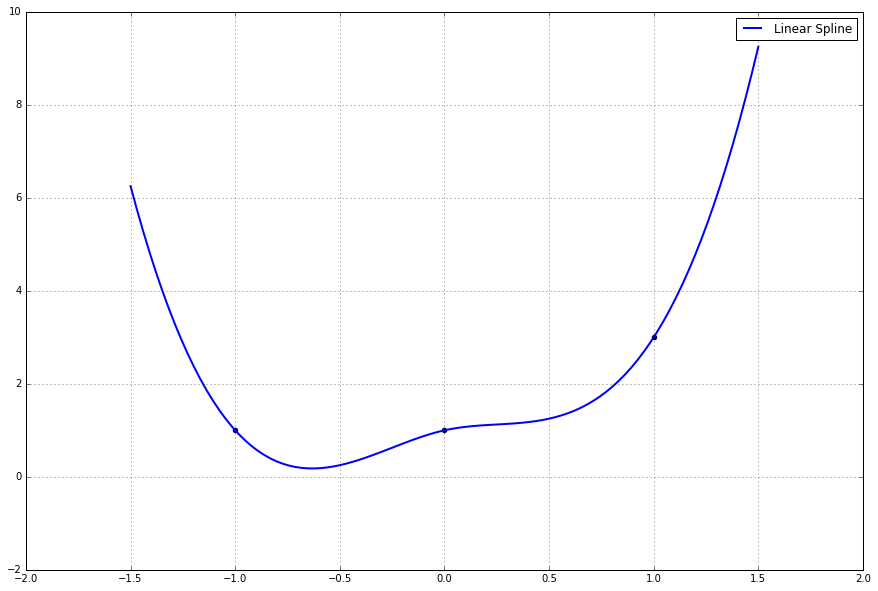

0.25
1.25


In [24]:
Xs = [-1, 0, 1]
Fx = [1, 1, 3]
Fp = [-5, 1, 7]

HermiteMultiPlot(Xs, Fx, Fp)
h = HermiteSplineMultipoint(Xs, Fx, Fp)
print(h(-.5))
print(h(.5))

## Drawing Line Segment at x with given slope

given $m = \tan(\theta)$. We have $1+m^2 = \sec ^2(\theta)$
$$
    \cos(\theta) = \frac{1}{\sqrt{1+m^2}}\\
    \sin(\theta) = \frac{m}{\sqrt{1+m^2}}
$$

In [60]:
def draw_slope_line(xx, yy, m):
    c = 1/sqrt(1+m^2) / 5
    s = m*c
    
    return line2d([[xx+c, yy+s], [xx-c, yy-s]], thickness=1.5, rgbcolor=(.1, .1, .1))

def draw_slope_lines(XX, YY, MM, p=None):
    if p is None:
        p = draw_slope_line(XX[0], YY[0], MM[0])
    else:
        p += draw_slope_line(XX[0], YY[0], MM[0])
    
    for xx, yy, mm in zip(XX[1:], YY[1:], MM[1:]):
        p += draw_slope_line(xx, yy, mm)
    return p

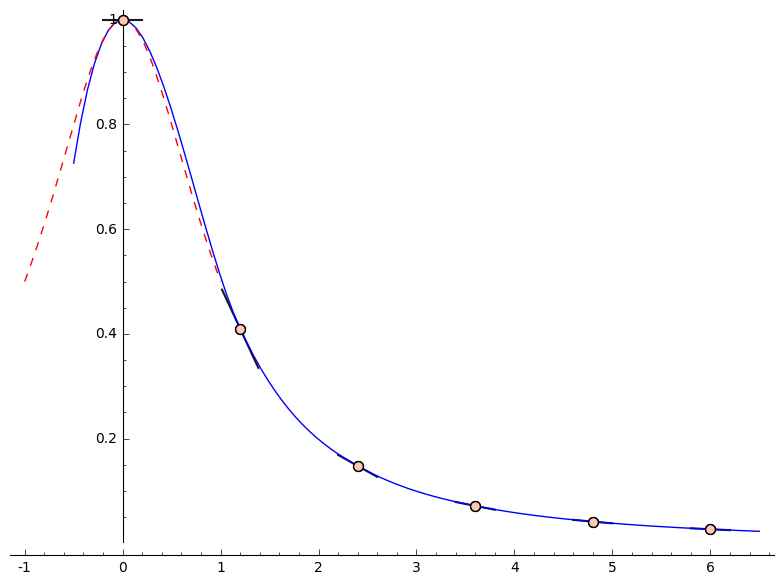

In [73]:
def plot_lines_point_based(f, XX, p = None, **kwargs):
    """
    plot function but point based, i.e. on given points.
    Like matplotlib plot function
    f: function
    XX: points to plot
    """
    
    if p is None:
        p = plot([])
    
    YY = [f(xx) for xx in XX]
    p+= line2d(zip(XX, YY), **kwargs)
    return p
    

def HermiteMultiPlotSage(Xs, Fx, Fprime, Func=None):
    
#     p = points(zip(Xs, Fx), rgbcolor=(1, .1, .1), size=30)
    p = scatter_plot(zip(Xs, Fx))
    p += draw_slope_lines(Xs, Fx, Fprime, p)
    
    X0, X1 = Xs[0]-.5, Xs[-1]+.5
    plX = np.linspace(X0, X1, 100)
    spline = HermiteSplineMultipoint(Xs, Fx, Fprime)
    p = plot_lines_point_based(spline, plX, p)
    if Func:
        p += plot(Func, linestyle='--', color='red')
    return p

Xs = np.linspace(0, 6, 6)
def F(x):
    return 1/(1+x^2)
def Fp(x):
    return -2*x/(1+x*x)**2

p = HermiteMultiPlotSage(Xs, F(Xs), Fp(Xs), F)
show(p)

## Animate the changes

In [27]:
def helper(eps):
    Xs = [0, 1];
    Fx = [0, 0];
    Fprime = [eps, -1]
    
    p = HermiteMultiPlotSage(Xs, Fx, Fprime)
    
    poly = HermiteSplineMultipoint(Xs, Fx, Fprime).get_poly_of_index(0)
    
    poly_title = '$' + str(poly).replace('*', '') + '$'
    p += text(poly_title, (1, .5), fontsize='large', rgbcolor=(0, 0, 0))
    p += text('$m_0 = {}$'.format(round(eps, 2)), (1, .4), fontsize='large', rgbcolor=(.2, .1, .1))
    p.set_axes_range(-.5, 1.5, -1, 1)
    return p

# akdfadf=1

In [28]:
@interact
def _(eps=slider(vmin=-1, vmax=1, step_size=.01)):
    show(helper(eps))

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZjFlYWQwMTFhNTA+IHdpdGggMSB3aWRnZXQKICBlcHM6IFRyYW5zZm9ybUZsb2F0U2xpZGVyKHZhbHVlPTAuMCwgbWluPS3igKY=


In [29]:
# a = animate([helper(i) for i in sxrange(-5, 5, .2)])
# a.show()
# a.save('hermite_spline.gif')

### Graphs to be used in slides

-2.0*x^3 + 2.0*x^2 + 1.0*x

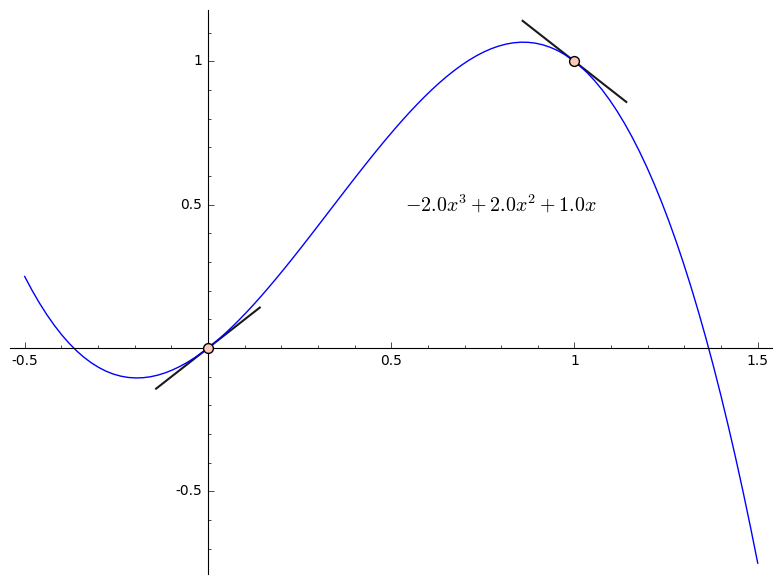

In [39]:
# graph to used in slide
Xs = [0, 1]
Fx = [0, 1]
Fprime = [1, -1]
p = scatter_plot(zip(Xs, Fx))
p = draw_slope_lines(Xs, Fx, Fprime, p)
p.set_axes_range(-1, 2, -1, 2)
h = HermiteSplineMultipoint(Xs, Fx, Fprime)
show(h.get_poly_of_index(0))
# p.save('initial_slope_field.png')
# p.show()
p = HermiteMultiPlotSage(Xs, Fx, Fprime)
poly = h.get_poly_of_index(0)
poly_title = '$' + str(poly).replace('*', '') + '$'
p += text(poly_title, (.8, .5), fontsize='large', rgbcolor=(0, 0, 0))
# p += text('$m_0 = {}$'.format(round(eps, 2)), (1, .4), fontsize='large', rgbcolor=(.2, .1, .1))
show(p)
p.save('initial_hermite.png')

In [40]:
Xs = [0, 1, 2, 3]
Fx = [0, 0, 0, 0]
Fp = [1, -1, 1, -1]

spline = HermiteSplineMultipoint(Xs, Fx, Fp)
for i in range(3):
    show(spline.get_poly_of_index(i))

-1.0*x^2 + 1.0*x

1.0*x^2 - 3.0*x + 2.0

-1.0*x^2 + 5.0*x - 6.0

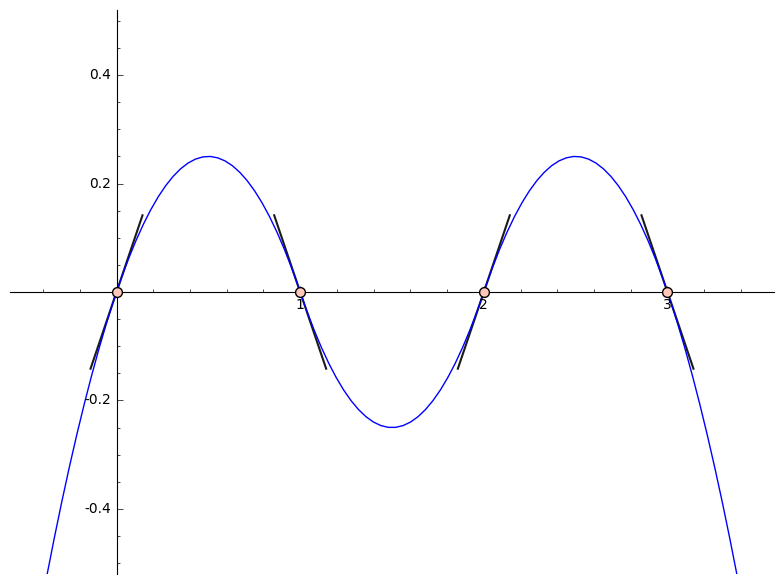

In [43]:
p = HermiteMultiPlotSage(Xs, Fx, Fp)
p.set_axes_range(-.5, 3.5, -.5, .5)
show(p)
p.save('hermite_multi_ex1.png')

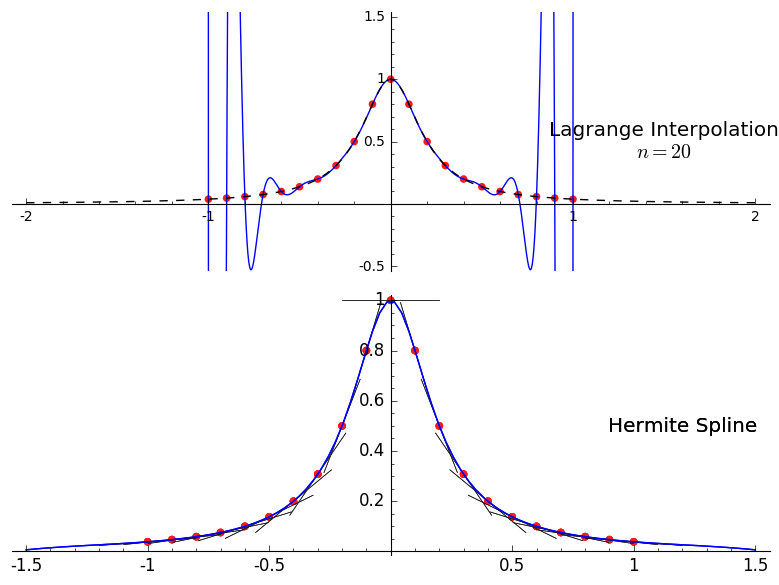

In [55]:
import numpy as np
# Lagrange's Interpolation
def lagrange_interp(Xs, Ys):
    n = len(Xs)
    L = 0
    for i in range(n):
        Lk = Ys[i]
        for j in range(n):
            if i==j: continue
            
            Lk *= (x-Xs[j])/(Xs[i]-Xs[j])
        L += Lk
    return L.expand()

def runges_n(n):
    f(x) = 1/(1+25*x^2)
    Xs = list(np.linspace(-1, 1, n+1, endpoint=True))
    Ys = [f(xi) for xi in Xs]
    p = plot(lagrange_interp(Xs, Ys), (x, -2, 2))
    p += plot(f, (x, -2, 2), linestyle='--', color='black')

    p+= points(zip(Xs, Ys), rgbcolor=(1, .1, .1), size=30)
    
    p += text("Lagrange Interpolation\n$n={}$".format(n), (1.5, .5), fontsize='large', rgbcolor=(0,0,0))
    p.set_axes_range(-2, 2, -.5, 1.5)
    return p

def runge_hermite_n(n):
    f(x) = 1/(1+25*x^2)
    fp = f.diff(x)
    Xs = list(np.linspace(-1, 1, n+1, endpoint=True))
    Ys = [f(xi) for xi in Xs]
    Fps = [fp(xi) for xi in Xs]
    
    return HermiteMultiPlotSage(Xs, Ys, Fps)
p1 = runges_n(20)
p2 = runge_hermite_n(20)
p2 += text('Hermite Spline', (1.2, .5), fontsize='large', rgbcolor=(0,0,0))

g = graphics_array([p1, p2], 2, 1)
g.show()

In [56]:
g.save('runge_revisit.png')

In [74]:
X1 = [0, 1]
F1 = [0, 1]
Fp1 = [1, -1]

X2 = [1, 2]
F2 = [1, 0]
Fp2 = [0, 1]

p1 = HermiteMultiPlotSage(X1, F1, Fp1)
p2 = HermiteMultiPlotSage(X2, F2, Fp2)

spl1 = HermiteSplineMultipoint(X1, F1, Fp1).get_poly_of_index(0)
spl2 = HermiteSplineMultipoint(X2, F2, Fp2).get_poly_of_index(0)

show(spl1)
show(spl2)

-2.0*x^3 + 2.0*x^2 + 1.0*x

3.0*x^3 - 13.0*x^2 + 17.0*x - 6.0